In [1]:
# Important library imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

2021-10-05 16:43:22.080040: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-05 16:43:22.080147: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Importing required libraries.

In [2]:
# Read the labels.csv file and checking shape and records
labels_all = pd.read_csv(r"C:\Users\MMM\Downloads\deep learning - Copy\dog breed dataset\dog breeds image dataset")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


Loading the labels data into dataframe and viewing it. Here we analysed that labels contains 10222 rows and 2 columns.  

In [3]:
# Visualize the number of each breeds
breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
breed_counts.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

Here we are finding out the count per class i.e. total data in each class using value_counts() function.

In [4]:
# Selecting first 3 breeds (Limitation due to computation power)
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


We will work on only 3 breeds due to limited computational power. You can consider more classes as per your system computational power.

In [5]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('/kaggle/input/dogbreedidfromcomp/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 357/357 [00:03<00:00, 112.50it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


As we are working with the classification dataset first we need to one hot encode the target value i.e. the classes. After that we will read images and convert them into numpy array and finally normalizing the array.

In [6]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

2021-10-05 16:43:31.966294: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-05 16:43:31.969315: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-05 16:43:31.969352: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-05 16:43:31.969377: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (4ba37814d23c): /proc/driver/nvidia/version does not exist
2021-10-05 16:43:31.970525: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 16)        25104     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 8)         3

Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).


After defining the network architecture we found out the total parameters as 162,619.

In [7]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

After defining the network architecture we will start with splitting the test and train data then dividing train data in train and validation data. 

Now we will train our model on 100 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

In [8]:
# Training the model
epochs = 100
batch_size = 128
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))

2021-10-05 16:43:33.082791: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-05 16:43:33.098628: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/100


2021-10-05 16:43:34.073165: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1585971200 exceeds 10% of free system memory.
2021-10-05 16:43:43.586777: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1585971200 exceeds 10% of free system memory.


1/2 [==============>...............] - ETA: 17s - loss: 4.9213 - accuracy: 0.3516

2021-10-05 16:43:50.177737: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1585971200 exceeds 10% of free system memory.
2021-10-05 16:43:56.549444: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1585971200 exceeds 10% of free system memory.


2/2 [==============================] - 30s 13s/step - loss: 4.9149 - accuracy: 0.3490 - val_loss: 4.8854 - val_accuracy: 0.3846
Epoch 2/100


2021-10-05 16:44:03.195568: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1585971200 exceeds 10% of free system memory.


2/2 [==============================] - 21s 11s/step - loss: 4.8862 - accuracy: 0.3385 - val_loss: 4.8606 - val_accuracy: 0.3692
Epoch 3/100
2/2 [==============================] - 21s 11s/step - loss: 4.8603 - accuracy: 0.3568 - val_loss: 4.8352 - val_accuracy: 0.3692
Epoch 4/100
2/2 [==============================] - 21s 12s/step - loss: 4.8339 - accuracy: 0.3620 - val_loss: 4.8093 - val_accuracy: 0.3846
Epoch 5/100
2/2 [==============================] - 21s 11s/step - loss: 4.8098 - accuracy: 0.3464 - val_loss: 4.7841 - val_accuracy: 0.3846
Epoch 6/100
2/2 [==============================] - 21s 11s/step - loss: 4.7841 - accuracy: 0.3594 - val_loss: 4.7586 - val_accuracy: 0.3846
Epoch 7/100
2/2 [==============================] - 21s 11s/step - loss: 4.7589 - accuracy: 0.3490 - val_loss: 4.7331 - val_accuracy: 0.3846
Epoch 8/100
2/2 [==============================] - 21s 11s/step - loss: 4.7369 - accuracy: 0.3307 - val_loss: 4.7083 - val_accuracy: 0.3846
Epoch 9/100
2/2 [===============

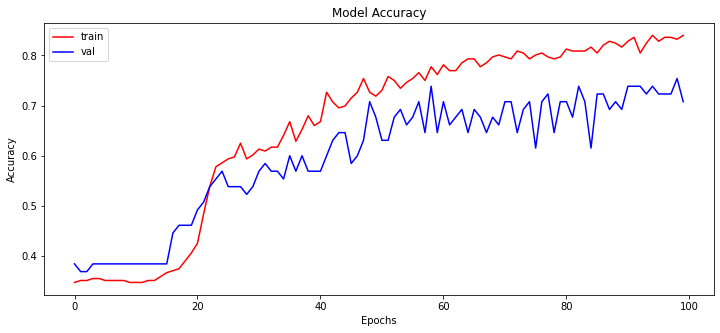

In [9]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Here we analyse how the model is learning with each epoch in terms of accuracy.

In [10]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 1s 78ms/step - loss: 3.2469 - accuracy: 0.6389
Accuracy over the test set: 
  63.89 %


We will use predict function to make predictions using this model also we are finding out the accuracy on the test set.

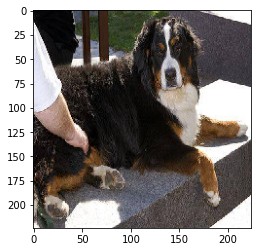

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [11]:
# Plotting image to compare
plt.imshow(X_test[2,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[2])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[2])])

Here you can see image with its original and predicted label.

## Conclusion:

We started with importing dataset, creating the model and finding out the predictions using the model. We can optimize different hyper parameters in order to tune this model for a higher accuracy. This model can be used to predict different breeds of dogs which can be further used by different NGO's working on saving animals and for educational purposes also.